**The best result: 80.313% accuracy**

## Overview

1) Setup <br>
2) Import Data <br>
3) Preview the Dataset <br>
4) Feature Engineering <br>
5) Data Preprocessing <br>
6) Model Building <br>
7) Model Tune <br>
8) Model Additional Ensemble Approaches <br>
9) Results

# Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

# Import Data

In [2]:
# Import train and test data
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

# Add a column to define if it's train data or not
data_train['train_test'] = 1
data_test['train_test'] = 0


# Concatenate the data 
all_data = pd.concat([data_train, data_test])

# Print the first and the last 5 rows
display(all_data.head())
display(all_data.tail())

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,train_test
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,1
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,1
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,train_test
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN,0
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN,0
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN,0
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN,0
4276,9277_01,Earth,True,G/1498/S,PSO J318.5-22,43.0,False,0.0,0.0,0.0,0.0,0.0,Lilace Leonzaley,NaN,0


# Preview the Dataset

In [3]:
# Print general information about the data
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 4276
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12660 non-null  object 
 3   Cabin         12671 non-null  object 
 4   Destination   12696 non-null  object 
 5   Age           12700 non-null  float64
 6   VIP           12674 non-null  object 
 7   RoomService   12707 non-null  float64
 8   FoodCourt     12681 non-null  float64
 9   ShoppingMall  12664 non-null  float64
 10  Spa           12686 non-null  float64
 11  VRDeck        12702 non-null  float64
 12  Name          12676 non-null  object 
 13  Transported   8693 non-null   object 
 14  train_test    12970 non-null  int64  
dtypes: float64(6), int64(1), object(8)
memory usage: 1.6+ MB


In [4]:
# Use the describe() method to understand the numeric data better 
all_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,train_test
count,12700.000000,12707.000000,12681.000000,12664.000000,12686.000000,12702.000000,12970.000000
mean,28.771969,222.897852,451.961675,174.906033,308.476904,306.789482,0.670239
std,14.387261,647.596664,1584.370747,590.558690,1130.279641,1180.097223,0.470144
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,38.000000,49.000000,77.000000,29.000000,57.000000,42.000000,1.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,1.000000


In [5]:
# Get the categorical data
df_cat = all_data.select_dtypes(include=['object','bool'])
# Get the numeric data
df_num = all_data.select_dtypes(include=['float64','int64']).drop(['train_test'], axis=1)

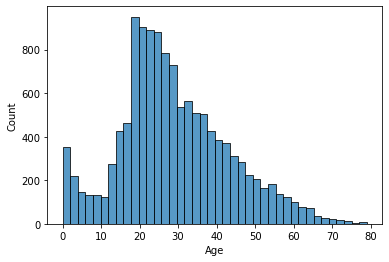

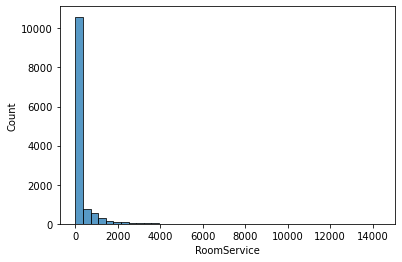

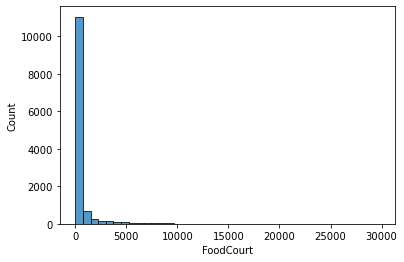

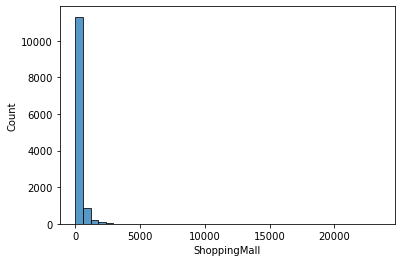

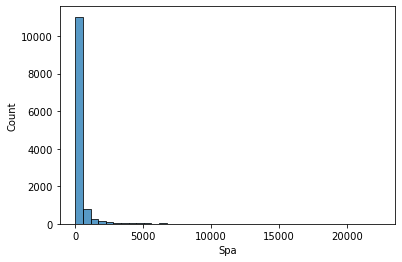

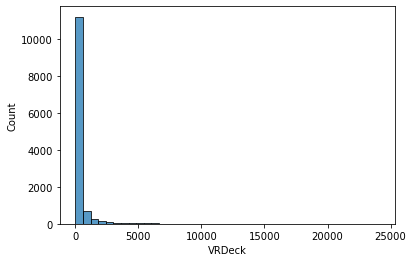

In [6]:
# Distributions for all the numeric data
for i in df_num:
    sns.histplot(df_num[i],bins=40)
    plt.show()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
Age,1.000000,0.067300,0.124447,0.034959,0.118992,0.101441
RoomService,0.067300,1.000000,-0.020146,0.057402,0.008936,-0.023847
FoodCourt,0.124447,-0.020146,1.000000,-0.001589,0.228990,0.244279
ShoppingMall,0.034959,0.057402,-0.001589,1.000000,0.010504,0.004485
Spa,0.118992,0.008936,0.228990,0.010504,1.000000,0.149874
VRDeck,0.101441,-0.023847,0.244279,0.004485,0.149874,1.000000


<AxesSubplot:>

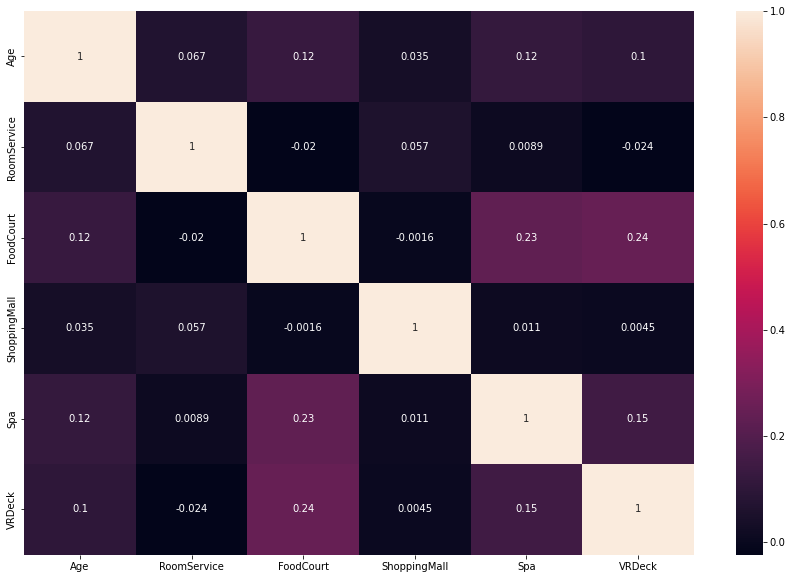

In [7]:
# Calculate the pairwise correlation of the columns
display(df_num.corr())

# Create the heatmap based on the correlation
plt.figure(figsize=(15,10))
sns.heatmap(data = df_num.corr(), annot = True)

In [8]:
# Compare the outcome dependence 
pd.pivot_table(data_train, index = 'Transported', values = df_num.columns)

,Age,FoodCourt,RoomService,ShoppingMall,Spa,VRDeck
Transported,,,,,,
False,29.922858,382.615930,389.266066,167.566217,564.382666,543.629822
True,27.748834,532.691984,63.098021,179.829972,61.675531,69.148131


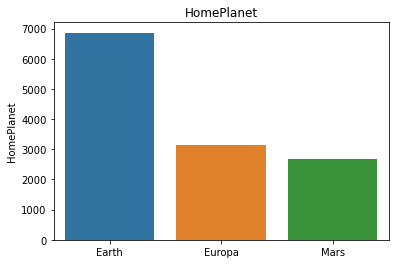

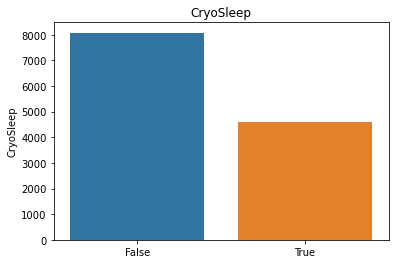

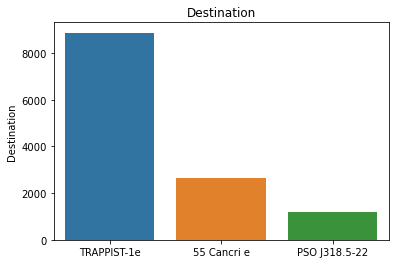

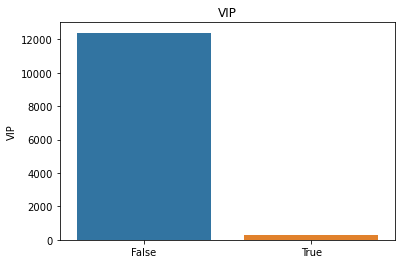

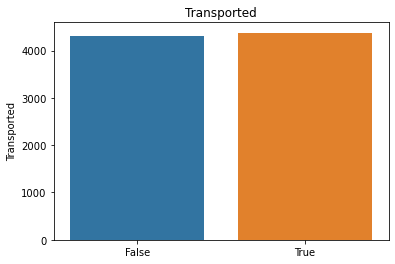

In [9]:
# Relationship of the categorical data 
for i in df_cat.columns.drop(['PassengerId','Name','Cabin']):
    sns.barplot(x = df_cat[i].value_counts().index, y = df_cat[i].value_counts()).set_title(i)
    plt.show()

In [10]:
# Compare the outcome dependence 
display(pd.pivot_table(data_train, index = 'Transported', columns='VIP', values= 'PassengerId', aggfunc='count'))
display(pd.pivot_table(data_train, index = 'Transported', columns='Destination', values= 'PassengerId', aggfunc='count'))
display(pd.pivot_table(data_train, index = 'Transported', columns='CryoSleep', values= 'PassengerId', aggfunc='count'))
display(pd.pivot_table(data_train, index = 'Transported', columns='HomePlanet', values= 'PassengerId', aggfunc='count'))

VIP,False,True
Transported,,
False,4093,123
True,4198,76


Destination,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
Transported,,,
False,702,395,3128
True,1098,401,2787


CryoSleep,False,True
Transported,,
False,3650,554
True,1789,2483


HomePlanet,Earth,Europa,Mars
Transported,,,
False,2651,727,839
True,1951,1404,920


# Feature Engineering

1) **Cabin**. Takes the form deck/num/side, where side can be either P for Port or S for Starboard. <br>
2) **PassengerID**. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group

In [11]:
all_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,train_test
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,1
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,1
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1


In [12]:
# Split the Cabin column to 3 different columns
all_data[['Deck', 'Num', 'Side']] = (
    all_data['Cabin'].str.split('/', expand= True)
)

In [13]:
# Split the PassengerId column to Group and GroupNumber
all_data[['Group','GroupNumber']] = (all_data['PassengerId'].str.split('_', expand=True))

In [14]:
# Check the existing columns
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 4276
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12660 non-null  object 
 3   Cabin         12671 non-null  object 
 4   Destination   12696 non-null  object 
 5   Age           12700 non-null  float64
 6   VIP           12674 non-null  object 
 7   RoomService   12707 non-null  float64
 8   FoodCourt     12681 non-null  float64
 9   ShoppingMall  12664 non-null  float64
 10  Spa           12686 non-null  float64
 11  VRDeck        12702 non-null  float64
 12  Name          12676 non-null  object 
 13  Transported   8693 non-null   object 
 14  train_test    12970 non-null  int64  
 15  Deck          12671 non-null  object 
 16  Num           12671 non-null  object 
 17  Side          12671 non-null  object 
 18  Group         12970 non-nul

# Data Preprocessing

1) Impute numeric data <br>
2) One-hot encode categorical data

In [15]:
all_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,train_test,Deck,Num,Side,Group,GroupNumber
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,B,0,P,0001,01
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,1,F,0,S,0002,01
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,1,A,0,S,0003,01
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,1,A,0,S,0003,02
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1,F,1,S,0004,01


In [16]:
all_data.nunique()

PassengerId     12970
HomePlanet          3
CryoSleep           2
Cabin            9825
Destination         3
Age                80
VIP                 2
RoomService      1578
FoodCourt        1953
ShoppingMall     1367
Spa              1679
VRDeck           1642
Name            12629
Transported         2
train_test          2
Deck                8
Num              1894
Side                2
Group            9280
GroupNumber         8
dtype: int64

In [17]:
# Separate Transported column so it doesn't change
transported_col = all_data.pop('Transported')

# Make a list of the modified categorical data with up to 50 unique values
df_cat = list(all_data.select_dtypes(include=['object','bool']).columns)
mask = list(all_data[df_cat].nunique()<50)
df_cat = [b for a,b in zip(mask,df_cat) if a]

# Make a list of the modified numeric data
df_num = list(all_data.select_dtypes(include=['float64','int64']).columns)

In [18]:
# Count the percentage of missing data
missing_values_count = all_data.isnull().sum()
total_cells = np.product(all_data.shape)
total_missing = missing_values_count.sum()
percent_missing = (total_missing/total_cells)*100
print("Percentage of missing data: " + str(round(percent_missing, 2)) + "%")

Percentage of missing data: 1.76%


In [19]:
from sklearn.impute import SimpleImputer

# Impute the numeric data with the most frequent value
imputer = SimpleImputer(strategy='most_frequent')
df_num_imputed = pd.DataFrame(imputer.fit_transform(all_data[df_num]), columns= all_data[df_num].columns)

In [20]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encode the categorical data
ohe = OneHotEncoder(drop = 'first',sparse=False)
df_cat_encoded = pd.DataFrame(ohe.fit_transform(all_data[df_cat]), index = all_data[df_cat].index)

In [21]:
# Reset indexes
df_cat_encoded.reset_index(drop=True ,inplace=True)
df_num_imputed.reset_index(drop=True, inplace=True)
transported_col.reset_index(drop=True, inplace=True)

# Concatenate imputed numeric data and one-hot encoded categorical data
all_data = pd.concat([df_cat_encoded, df_num_imputed, transported_col], axis=1)
all_data.columns = all_data.columns.astype(str)

In [22]:
all_data.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,train_test,Transported
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,39.0,0.0,0.0,0.0,0.0,0.0,1.0,False
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,24.0,109.0,9.0,25.0,549.0,44.0,1.0,True
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,58.0,43.0,3576.0,0.0,6715.0,49.0,1.0,False
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,33.0,0.0,1283.0,371.0,3329.0,193.0,1.0,False
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,16.0,303.0,70.0,151.0,565.0,2.0,1.0,True


In [23]:
#Split to train and test again
X_train = all_data[all_data.train_test == 1].drop(['train_test'], axis = 1)
y_train = X_train.pop('Transported').astype(int)

X_test = all_data[all_data.train_test == 0].drop(['train_test'], axis = 1)
X_test.drop(columns='Transported',inplace=True)

# Model Building

- Gaussian Naive Bayes (75.9%) <br>
- Logistic Regression (78.8%) <br>
- Decision Tree (73.3%) <br>
- K Nearest Neighbour (77.2%) <br>
- Random Forest Classifier (78.5%) <br>
- Support Vector Classifier (78.6%) <br>
- Xtreme Gradient Boosting (79.3%) <br>
- Gradient Boosting Classifier (79.7%) <br>
- **CatBoost Classifier (80.0%)** <br>
- Ridge Classifier (76.9%)

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [25]:
gnb = GaussianNB()
cv = cross_val_score(gnb,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.74123059 0.74525589 0.77285796 0.78481013 0.75546605]
0.7599241260700996


In [26]:
lr = LogisticRegression(max_iter= 2000)
cv = cross_val_score(lr, X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.7786084  0.78723404 0.79930995 0.78423475 0.79286536]
0.7884505003007563


In [27]:
dt = tree.DecisionTreeClassifier()
cv = cross_val_score(dt, X_train, y_train,cv=5)
print(cv)
print(cv.mean())

[0.72225417 0.72742956 0.74008051 0.73360184 0.74223245]
0.7331197049214824


In [28]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn, X_train, y_train, cv=5)
print(cv)
print(cv.mean())

[0.77055779 0.77285796 0.7613571  0.76869965 0.78941312]
0.7725771262533988


In [29]:
rf = RandomForestClassifier()
cv = cross_val_score(rf, X_train, y_train, cv=5)
print(cv)
print(cv.mean())

[0.77113283 0.77975848 0.78723404 0.79516686 0.79516686]
0.7856918152635901


In [30]:
svc = SVC(probability= True)
cv = cross_val_score(svc, X_train, y_train,cv=5)
print(cv)
print(cv.mean())

[0.76883266 0.77228292 0.78953422 0.80034522 0.79919448]
0.7860378999080858


In [31]:
xgb = XGBClassifier()
cv = cross_val_score(xgb, X_train, y_train,cv=5)
print(cv)
print(cv.mean())

[0.77515814 0.78780909 0.79758482 0.81070196 0.79574223]
0.793399246025155


In [32]:
gbc = GradientBoostingClassifier()
cv = cross_val_score(gbc, X_train, y_train, cv = 5)
print(cv)
print(cv.mean())

[0.78378378 0.79240943 0.80046003 0.81472957 0.79746835]
0.79777023552946


In [33]:
catboost = CatBoostClassifier(verbose=0)
cv = cross_val_score(catboost, X_train, y_train, cv=5)
print(cv)
print(cv.mean())

[0.78148361 0.79528465 0.80448534 0.82220944 0.8009206 ]
0.8008767257083982


In [34]:
ridge = RidgeClassifier()
cv = cross_val_score(ridge, X_train, y_train, cv=5)
print(cv)
print(cv.mean())

[0.76250719 0.77573318 0.76480736 0.77100115 0.77560414]
0.7699306044040759


In [35]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators= [('gnb',gnb),('lr',lr),('rf',rf),('svc',svc),('xgb',xgb),('gbc',gbc),('catboost',catboost),('ridge',ridge)], voting='hard')

In [36]:
cv = cross_val_score(voting_clf, X_train, y_train, cv = 5, error_score='raise')
print(cv)
print(cv.mean())

[0.78723404 0.79010926 0.80161012 0.81357883 0.80609896]
0.7997262424140958


# Model Tune

<table>
    <tr>
        <th>Model</th>
        <th>Baseline</th>
        <th>Tuned Performance</th>
    </tr>
    <tr>
        <td>Gaussian Naive Bayes</td>
        <td>75.9%</td>
        <td>N/A</td>
    </tr>
    <tr>
        <td>Logistic Regression</td>
        <td>78.8%</td>
        <td>79.0%</td>
    </tr>
    <tr>
        <td>Decision Tree</td>
        <td>73.3%</td>
        <td>N/A</td>
    </tr>
    <tr>
        <td>K Nearest Neighbour</td>
        <td>77.2%</td>
        <td>N/A</td>
    </tr>
    <tr>
        <td>Random Forest Classifier</td>
        <td>78.5%</td>
        <td>79.7%</td>
    </tr>
    <tr>
        <td>Support Vector Classifier</td>
        <td>78.6%</td>
        <td>78.6%</td>
    </tr>
    <tr>
        <td>Support Vector Classifier</td>
        <td>78.6%</td>
        <td>78.6%</td>
    </tr>
    <tr>
        <td>Xtreme Gradient Boosting</td>
        <td>79.3%</td>
        <td>N/A</td>
    </tr>
    <tr>
        <td>Gradient Boosting Classifier</td>
        <td>79.7%</td>
        <td>80.0%</td>
    </tr>
    <tr>
        <td>CatBoost Classifier</td>
        <td>80.0%</td>
        <td>N/A</td>
    </tr>
    <tr>
        <td>Ridge Classifier</td>
        <td>76.9%</td>
        <td>78.3%</td>
    </tr>
<table>

In [37]:
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 

In [38]:
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [39]:
lr = LogisticRegression()
param_grid = [
    {'max_iter': [1500,1700,2000],
    'penalty': ['l1', 'l2'],
    'C': np.logspace(-4, 4, 20),
    'solver': ['liblinear']
    }, 
    {'max_iter': [2000],
    'penalty': ['l2', 'none'],
    'C': np.logspace(-4, 4, 20),
    'solver': ['lbfgs']
    }]

clf_lr = GridSearchCV(lr, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_lr = clf_lr.fit(X_train,y_train)
clf_performance(best_clf_lr,'Logistic Regression')

Fitting 5 folds for each of 160 candidates, totalling 800 fits
Logistic Regression
Best Score: 0.7904069042232253
Best Parameters: {'C': 0.03359818286283781, 'max_iter': 1500, 'penalty': 'l1', 'solver': 'liblinear'}


In [40]:
rf = RandomForestClassifier()
param_grid = {
    'n_estimators': [100,150],
    'class_weight': ['balanced_subsample', None],
    'max_depth': [8,16,24],
    'min_samples_split': [2,4,6],
    'min_samples_leaf': [3,4,5],
    'max_features': ['sqrt', 'log2']
}
clf_rf = GridSearchCV(rf, param_grid=param_grid, cv=5, verbose= True, n_jobs=-1)
best_clf_rf = clf_rf.fit(X_train,y_train)
clf_performance(best_clf_rf,'rf')

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
rf
Best Score: 0.7971957217850028
Best Parameters: {'class_weight': None, 'max_depth': 16, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 100}


In [41]:
svc = SVC(probability = True)
param_grid = {
    'kernel': ['rbf'],
    'gamma': ['scale'],
    'C': [1.05, 1.1,1.15]
    }
clf_svc = GridSearchCV(svc, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_svc = clf_svc.fit(X_train,y_train)
clf_performance(best_clf_svc,'SVC')

Fitting 5 folds for each of 3 candidates, totalling 15 fits
SVC
Best Score: 0.7866131415552368
Best Parameters: {'C': 1.15, 'gamma': 'scale', 'kernel': 'rbf'}


In [42]:
gbc = GradientBoostingClassifier()
param_grid = {
    'loss' :['deviance','exponential'],
    'learning_rate':[0.05,0.1,0.15],
    'n_estimators':[100,150,200],
    'min_samples_leaf':[2,3,4],
    'max_depth':[3,4,5]
}
clf_gbc = GridSearchCV(gbc, param_grid=param_grid, cv=5, verbose=True, n_jobs=-1)
best_clf_gbc = clf_gbc.fit(X_train, y_train)
clf_performance(best_clf_gbc,'gbc')

Fitting 5 folds for each of 162 candidates, totalling 810 fits
gbc
Best Score: 0.8008760639786765
Best Parameters: {'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 3, 'min_samples_leaf': 3, 'n_estimators': 150}


In [43]:
ridge = RidgeClassifier()
param_grid = {
            'alpha': np.logspace(-4, 4, 20)
            }
clf_ridge = GridSearchCV(ridge, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_ridge = clf_ridge.fit(X_train,y_train)
clf_performance(best_clf_ridge,'ridge')

Fitting 5 folds for each of 20 candidates, totalling 100 fits
ridge
Best Score: 0.7837352128222045
Best Parameters: {'alpha': 3792.690190732246}


# Model Additional Ensemble Approaches

1. Hard voting classifier (LR, RF, SVC, GBC, Ridge, CatBoost) (79.9%)
2. Soft voting classifier (LR, RF, SVC, GBC, CatBoost) (80.1%)

In [44]:
# Take the best perfomed estimator for each model
best_lr = best_clf_lr.best_estimator_
best_rf = best_clf_rf.best_estimator_
best_svc = best_clf_svc.best_estimator_
best_ridge = best_clf_ridge.best_estimator_
best_gbc = best_clf_gbc.best_estimator_

voting_clf_hard = VotingClassifier(estimators=[('best_lr',best_lr),('best_rf',best_rf),('best_svc', best_svc),('best_gbc', best_gbc),('best_ridge',best_ridge),('catboost',catboost)], voting='hard')
# 'RidgeClassifier' object has no attribute 'predict_proba'
voting_clf_soft = VotingClassifier(estimators=[('best_lr',best_lr),('best_rf',best_rf),('best_svc', best_svc),('best_gbc', best_gbc),('catboost',catboost)], voting='soft')

cv = cross_val_score(voting_clf_hard,X_train,y_train,cv=5)
print('voting_clf_hard :',cv)
print('voting_clf_hard mean :',cv.mean())

cv = cross_val_score(voting_clf_soft,X_train,y_train,cv=5)
print('voting_clf_soft :',cv)
print('voting_clf_soft mean :',cv.mean())

voting_clf_hard : [0.78320874 0.79355952 0.80621047 0.8164557  0.79976985]
voting_clf_hard mean : 0.7998408540019097
voting_clf_soft : [0.78780909 0.7947096  0.80218516 0.82048331 0.8009206 ]
voting_clf_soft mean : 0.8012215530664225


In [45]:
voting_clf_hard.fit(X_train, y_train)
voting_clf_soft.fit(X_train, y_train)

VotingClassifier(estimators=[('best_lr',
                              LogisticRegression(C=0.03359818286283781,
                                                 max_iter=1500, penalty='l1',
                                                 solver='liblinear')),
                             ('best_rf',
                              RandomForestClassifier(max_depth=16,
                                                     max_features='log2',
                                                     min_samples_leaf=3)),
                             ('best_svc', SVC(C=1.15, probability=True)),
                             ('best_gbc',
                              GradientBoostingClassifier(min_samples_leaf=3,
                                                         n_estimators=150)),
                             ('catboost',
                              <catboost.core.CatBoostClassifier object at 0x000002E829588310>)],
                 voting='soft')

# Results

In [46]:
# Make preditions 
y_hat_vc_hard = voting_clf_hard.predict(X_test).astype(int)
y_hat_vc_soft = voting_clf_soft.predict(X_test).astype(int)

In [47]:
final_data = {'PassengerId': data_test.PassengerId, 'Transported': y_hat_vc_hard.astype(bool)}
submission1 = pd.DataFrame(data = final_data)

final_data2 = {'PassengerId': data_test.PassengerId, 'Transported': y_hat_vc_soft.astype(bool)}
submission2 = pd.DataFrame(data = final_data)

In [48]:
submission1.to_csv('submission_hard.csv', index=False)
submission2.to_csv('submission_soft.csv', index=False)